In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\Users\\srnva\\Desktop\\NIT Warangal\\Machine Learning\\airline_passengers.csv", index_col='Month', parse_dates=True)

In [6]:
df.index.freq = 'MS'

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], 
                                    trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [14]:
test_predictions = fitted_model.forecast(36)

In [15]:
test_predictions

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
1958-07-01    521.801193
1958-08-01    514.525372
1958-09-01    446.222776
1958-10-01    385.432121
1958-11-01    339.645926
1958-12-01    381.452236
1959-01-01    401.211186
1959-02-01    387.157129
1959-03-01    455.808535
1959-04-01    450.043490
1959-05-01    459.534631
1959-06-01    540.121064
1959-07-01    595.679687
1959-08-01    587.373728
1959-09-01    509.400604
1959-10-01    440.002990
1959-11-01    387.734221
1959-12-01    435.459618
1960-01-01    458.016112
1960-02-01    441.972230
1960-03-01    520.343550
1960-04-01    513.762270
1960-05-01    524.597200
1960-06-01    616.593351
1960-07-01    680.018164
1960-08-01    670.536218
1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

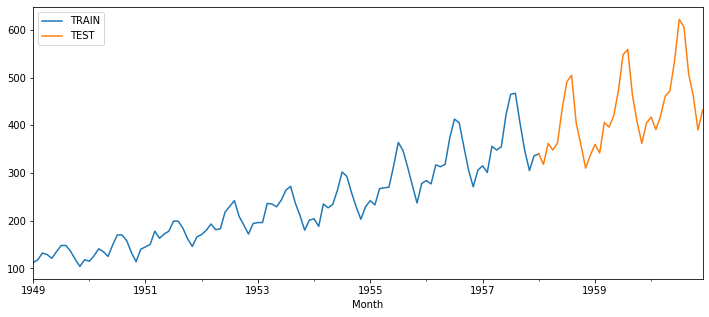

In [20]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

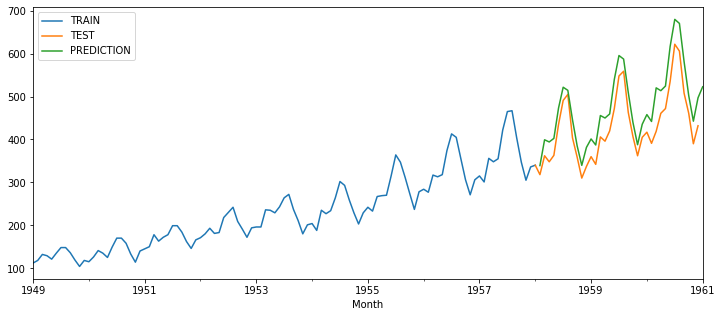

In [24]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION')

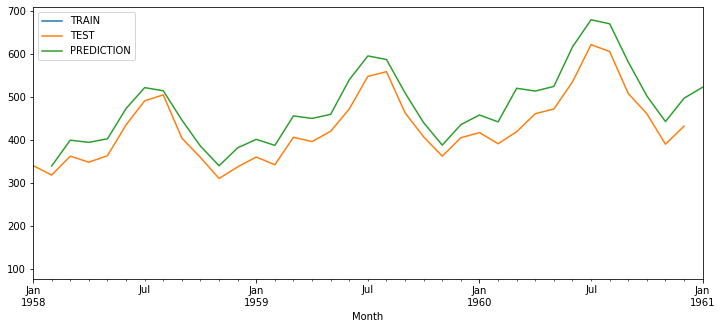

In [23]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01','1961-01-01'])

## Evaluating Predictions

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [28]:
mean_squared_error(test_data, test_predictions)

5614.4207149269

In [29]:
mean_absolute_error(test_data, test_predictions)

63.03138491847624

In [32]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92943823976594

## Forecast the Future

In [33]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [34]:
forecast_predictions = final_model.forecast(36)

In [35]:
forecast_predictions

1961-01-01    450.679728
1961-02-01    424.824052
1961-03-01    475.508514
1961-04-01    504.075221
1961-05-01    517.876390
1961-06-01    590.154919
1961-07-01    684.232157
1961-08-01    678.038045
1961-09-01    567.113950
1961-10-01    507.822380
1961-11-01    434.721820
1961-12-01    485.983552
1962-01-01    502.752184
1962-02-01    473.909090
1962-03-01    530.449738
1962-04-01    562.317100
1962-05-01    577.712884
1962-06-01    658.342623
1962-07-01    763.289736
1962-08-01    756.379945
1962-09-01    632.639453
1962-10-01    566.497214
1962-11-01    484.950466
1962-12-01    542.135083
1963-01-01    560.841197
1963-02-01    528.665513
1963-03-01    591.738983
1963-04-01    627.288365
1963-05-01    644.463010
1963-06-01    734.408873
1963-07-01    851.481790
1963-08-01    843.773627
1963-09-01    705.735906
1963-10-01    631.951458
1963-11-01    540.982632
1963-12-01    604.774477
Freq: MS, dtype: float64

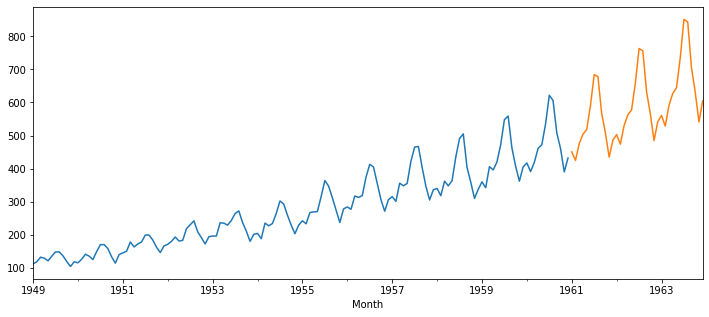

In [38]:
df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_predictions.plot()